# Proyek Analisis Data: `E-commerce-public-dataset`
- **Nama:** Mohamad Fikri Aulya Nor
- **Email:** mohfikri.aulyanor@gmail.com
- **ID Dicoding:** nairkivm

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara penilaian ulasan (*score review*) dengan penjualan produk?
- Dimana lokasi geografis dengan tingkat penggunaan produk tertinggi.


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.constants import Constants
from utils.utils import DataUtils
from tabulate import tabulate

## Data Wrangling

### Gathering Data

In [2]:
# Initialize the constants
c = Constants()

# Extract all data into dictionary of pandas DataFrames
data = {}
for source_ in c.source.keys():
    data[source_] = pd.read_csv(c.source[source_])

**Insight:**
- Terdapat 9 tabel dalam dataset ini
- Hubungan antartabel digambarkan dalam diagram *entity-relationship* berikut.

![ERD e-commerce-public-dataset](\assets\e-commerce-public.png)

### Assessing Data

Data Assessment for 'customers':
 > Data shape:  (99441, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'customer_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'geolocations':
 > Data shape:  (1000163, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'geolocation_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v
 > Duplicated data count:  390005
 > The outliers (geolocation_lat, geolocation_lng): 


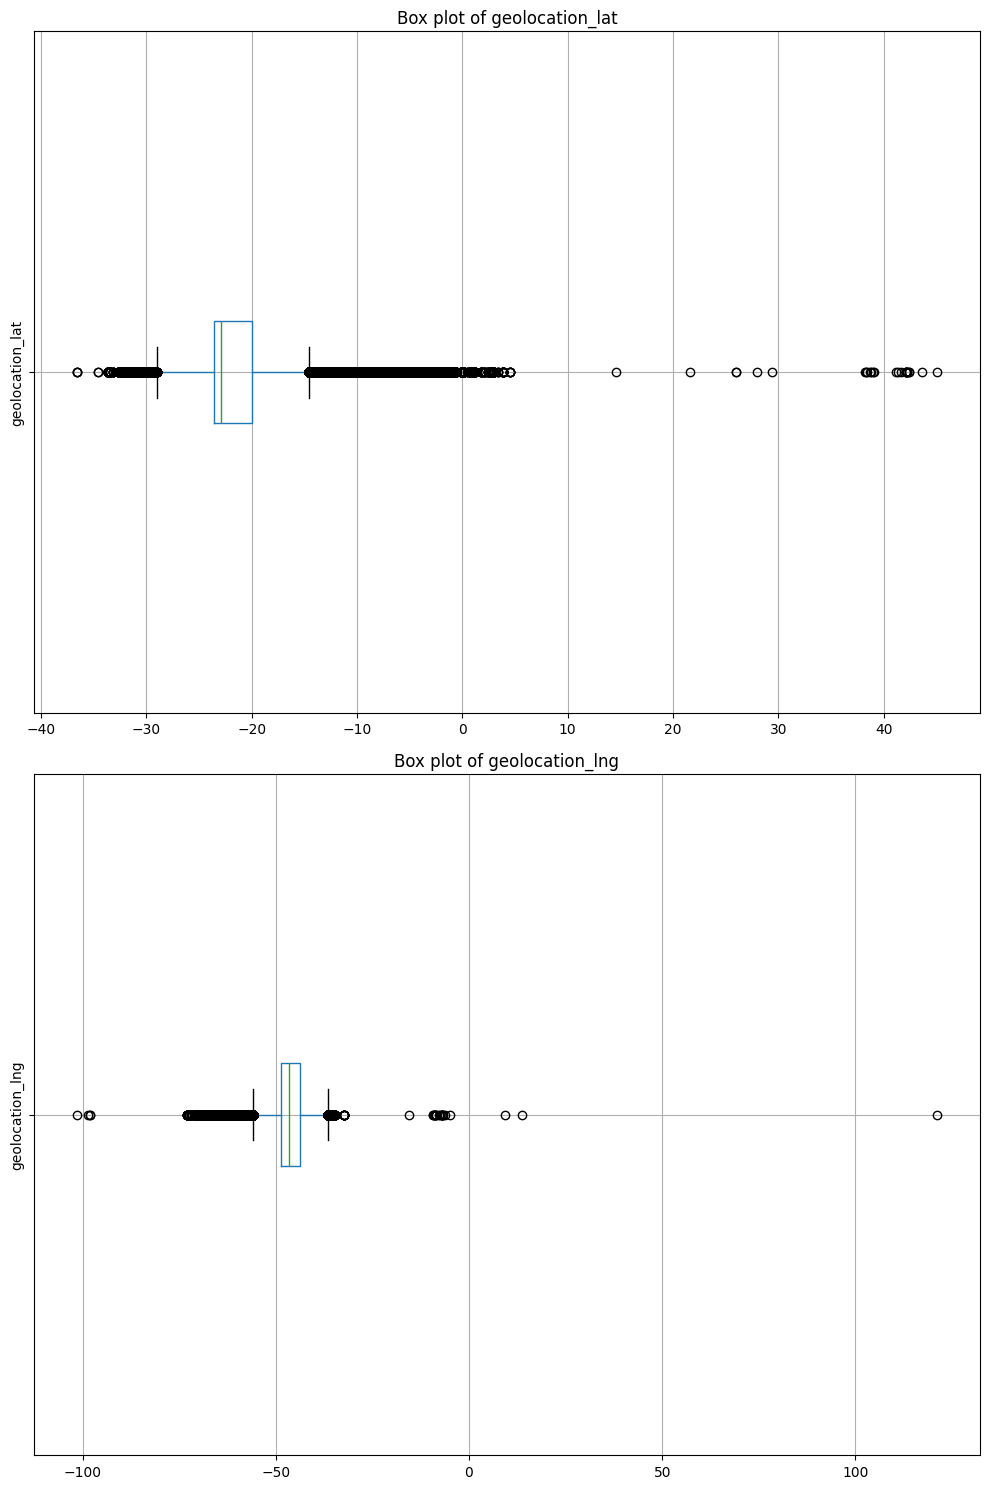

Data Assessment for 'order_items':
 > Data shape:  (112650, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'shipping_limit_date' column should be in 'datetime64[ns]' (original: object)!
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (order_item_id, price, freight_value): 


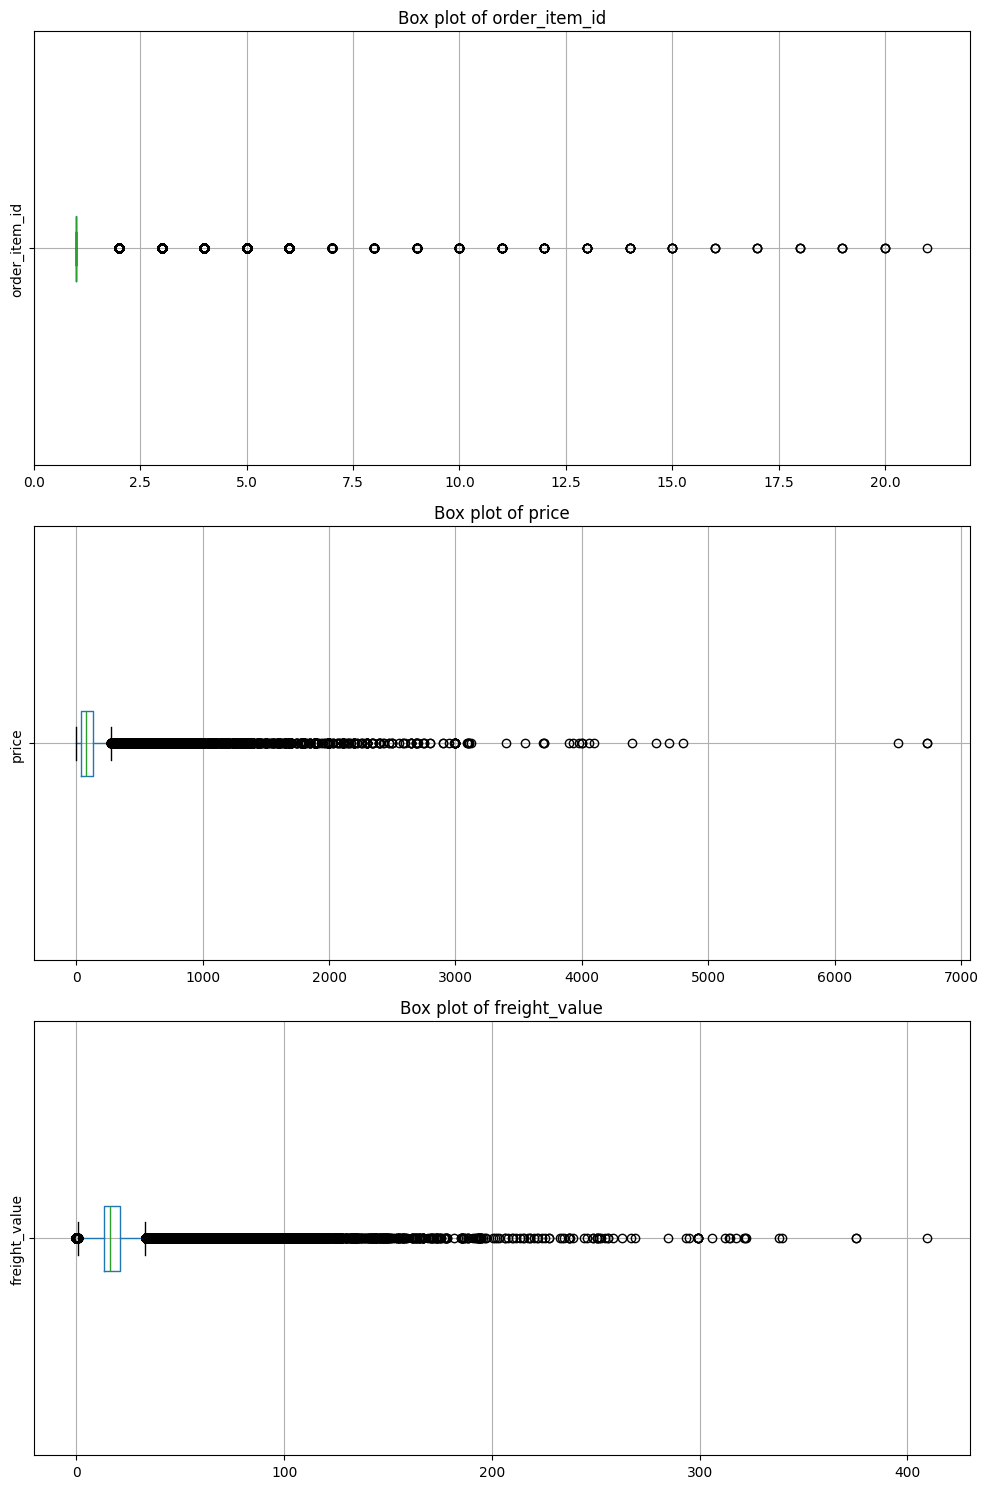

Data Assessment for 'order_payments':
 > Data shape:  (103886, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (payment_sequential, payment_installments, payment_value): 


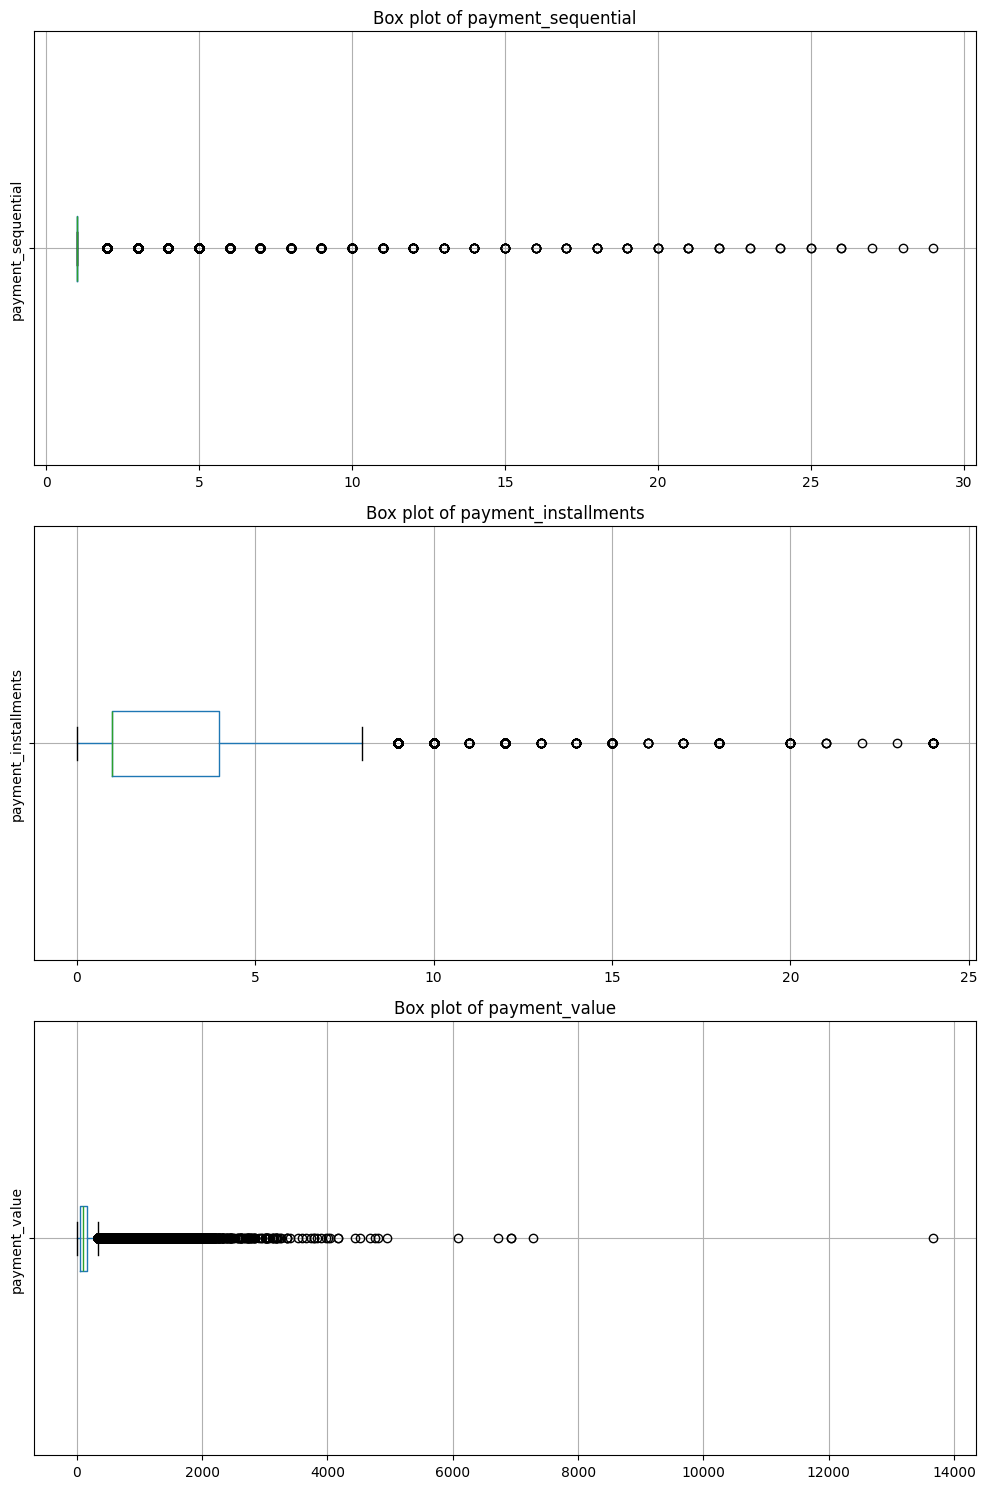

Data Assessment for 'order_reviews':
 > Data shape:  (99224, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'review_score' column should be in 'float64' (original: int64)!
      02. 'review_creation_date' column should be in 'datetime64[ns]' (original: object)!
      03. 'review_answer_timestamp' column should be in 'datetime64[ns]' (original: object)!
 > Missing value columns:
      - review_comment_title column : 88.34% (87656)
      - review_comment_message column : 58.70% (58247)
 > There is no duplicated data v
 > The outliers (review_score): 


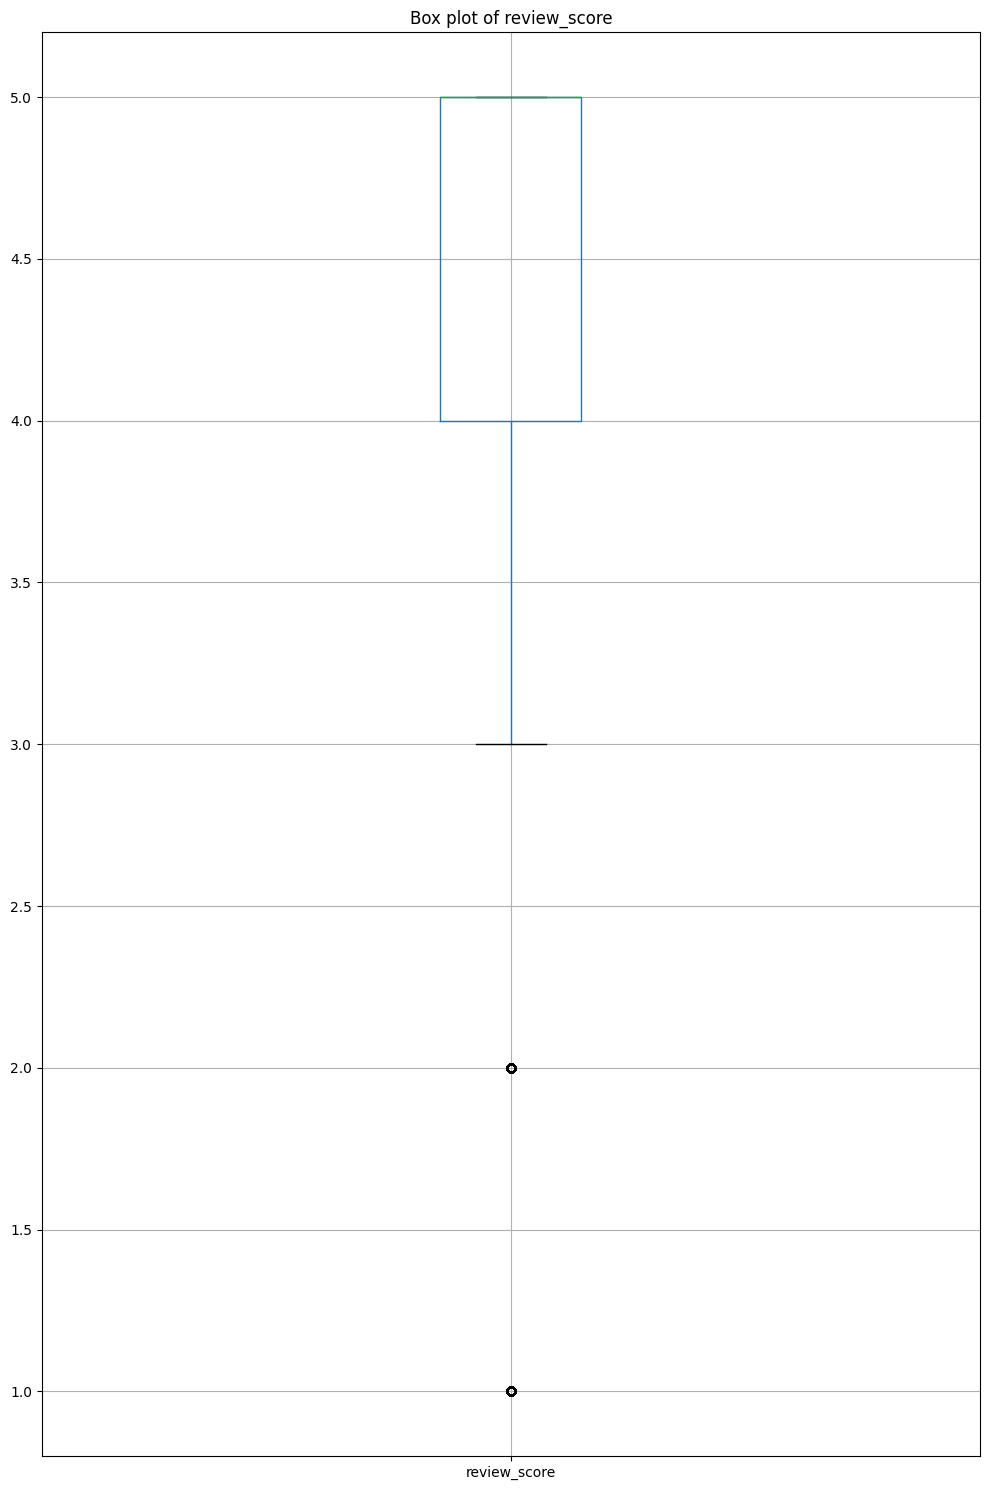

Data Assessment for 'orders':
 > Data shape:  (99441, 8)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'order_purchase_timestamp' column should be in 'datetime64[ns]' (original: object)!
      02. 'order_approved_at' column should be in 'datetime64[ns]' (original: object)!
      03. 'order_delivered_carrier_date' column should be in 'datetime64[ns]' (original: object)!
      04. 'order_delivered_customer_date' column should be in 'datetime64[ns]' (original: object)!
      05. 'order_estimated_delivery_date' column should be in 'datetime64[ns]' (original: object)!
 > Missing value columns:
      - order_approved_at    column : 0.16% (160 )
      - order_delivered_carrier_date column : 1.79% (1783)
      - order_delivered_customer_date column : 2.98% (2965)
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'product_category_name_translations':
 > Data shape:  (71, 2)
 

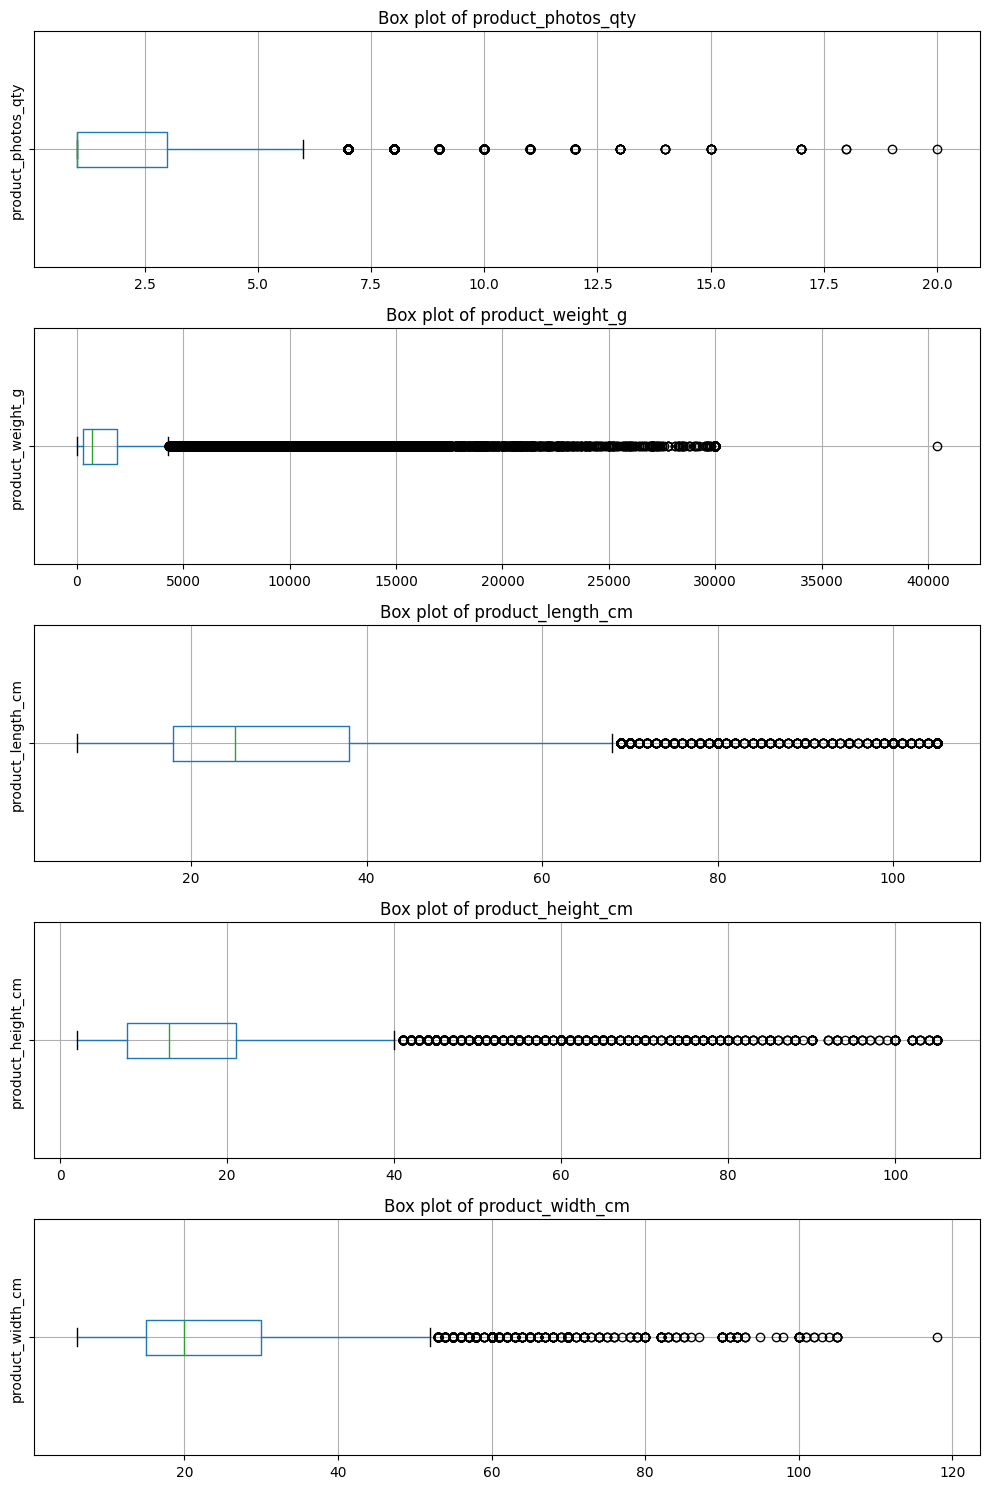

Data Assessment for 'sellers':
 > Data shape:  (3095, 4)
 > No column should be dropped v
 > All requirements columns are exists v
 > Mismatch type columns:
      01. 'seller_zip_code_prefix' column should be in 'object' (original: int64)!
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers


In [3]:
# Initialize DataUtils
u = DataUtils()

# Assess the data using asses_data
for source_ in c.source.keys():
    u.asses_data(data[source_], source_)

**Insight:**

- Masih banyak kolom dengan tipe data yang tidak sesuai *requirements*

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "customers"
    - 'customer_zip_code_prefix' column should be in 'object' (original: int64)
  - "geolocations"
    - 'geolocation_zip_code_prefix' column should be in 'object' (original: int64)
  - "order_items"
    - 'shipping_limit_date' column should be in 'datetime64[ns]' (original: object)
  - "order_reviews"
    - 'review_creation_date' column should be in 'datetime64[ns]' (original: object)
    - 'review_answer_timestamp' column should be in 'datetime64[ns]' (original: object)
  - "orders"
    - 'order_purchase_timestamp' column should be in 'datetime64[ns]' (original: object)
    - 'order_approved_at' column should be in 'datetime64[ns]' (original: object)
    - 'order_delivered_carrier_date' column should be in 'datetime64[ns]' (original: object)
    - 'order_delivered_customer_date' column should be in 'datetime64[ns]' (original: object)
    - 'order_estimated_delivery_date' column should be in 'datetime64[ns]' (original: object)
  - "products"
    - 'product_photos_qty' column should be in 'int64' (original: float64)
  - "sellers"
    - 'seller_zip_code_prefix' column should be in 'object' (original: int64)

    </details> 

<br>

- Kolom 'product_name_lenght' dan 'product_description_lenght' pada tabel "products" mengalami kesalahan penulisan
- Ada beberapa data yang mempunyai *missing value*

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "order_reviews"
    - review_comment_title column : 88.34% (87656)
    - review_comment_message column : 58.70% (58247)
  - "orders"
    - order_approved_at    column : 0.16% (160 )
    - order_delivered_carrier_date column : 1.79% (1783)
    - order_delivered_customer_date column : 2.98% (2965)
  - "products"
    - product_category_name column : 1.85% (610 )
    - product_photos_qty   column : 1.85% (610 )
    - product_weight_g     column : 0.01% (2   )
    - product_length_cm    column : 0.01% (2   )
    - product_height_cm    column : 0.01% (2   )
    - product_width_cm     column : 0.01% (2   )

    </details>

<br>

- Ada beberapa data yang duplikat, yaitu tabel "geolocations" sebanyak 390005 baris.

- Ada beberapa data yang memiliki outlier.

    <details>

    <summary> <i>Lihat detail</i> </summary>

  - "geolocations": geolocation_lat, geolocation_lng
  - "orders": price, freight_value
  - "order_payments": payment_sequential, payment_installments, payment_value
  - "order_reviews": review_score
  - "products": product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

    </details>

<br>

### Cleaning Data

C:\Users\mohfi\AppData\Local\Temp\ipykernel_13880\2511378002.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.08642062404257' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self._obj.loc[condition_more_than, col] = mean


Data Assessment for 'customers':
 > Data shape:  (99441, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'geolocations':
 > Data shape:  (738332, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (geolocation_lat, geolocation_lng): 


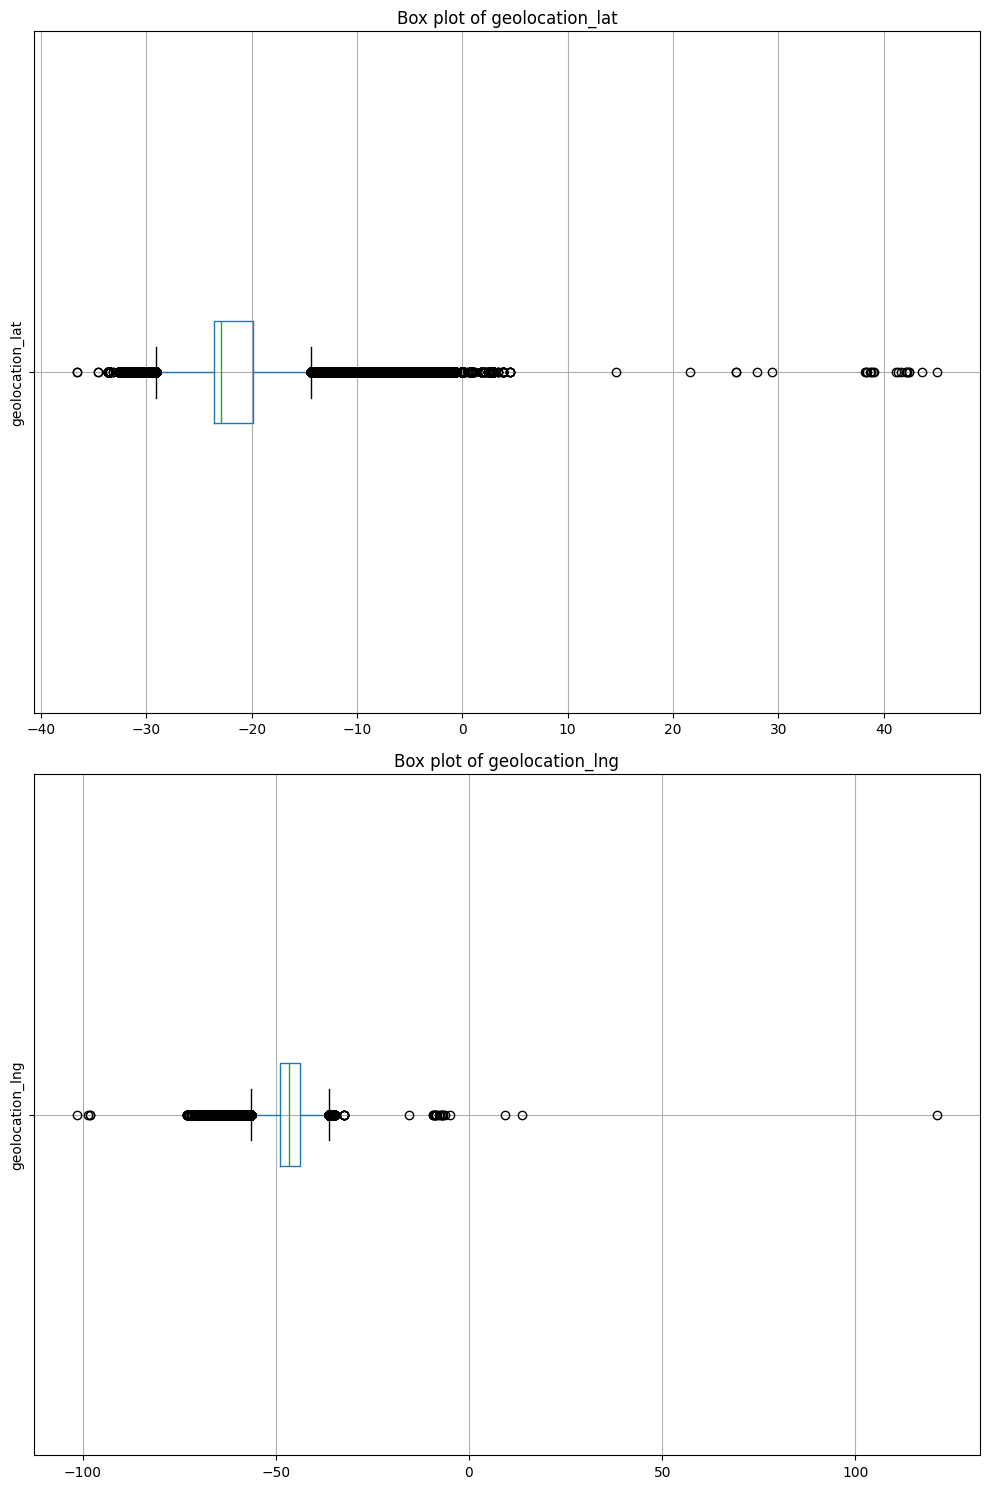

Data Assessment for 'order_items':
 > Data shape:  (112650, 7)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (order_item_id, price, freight_value): 


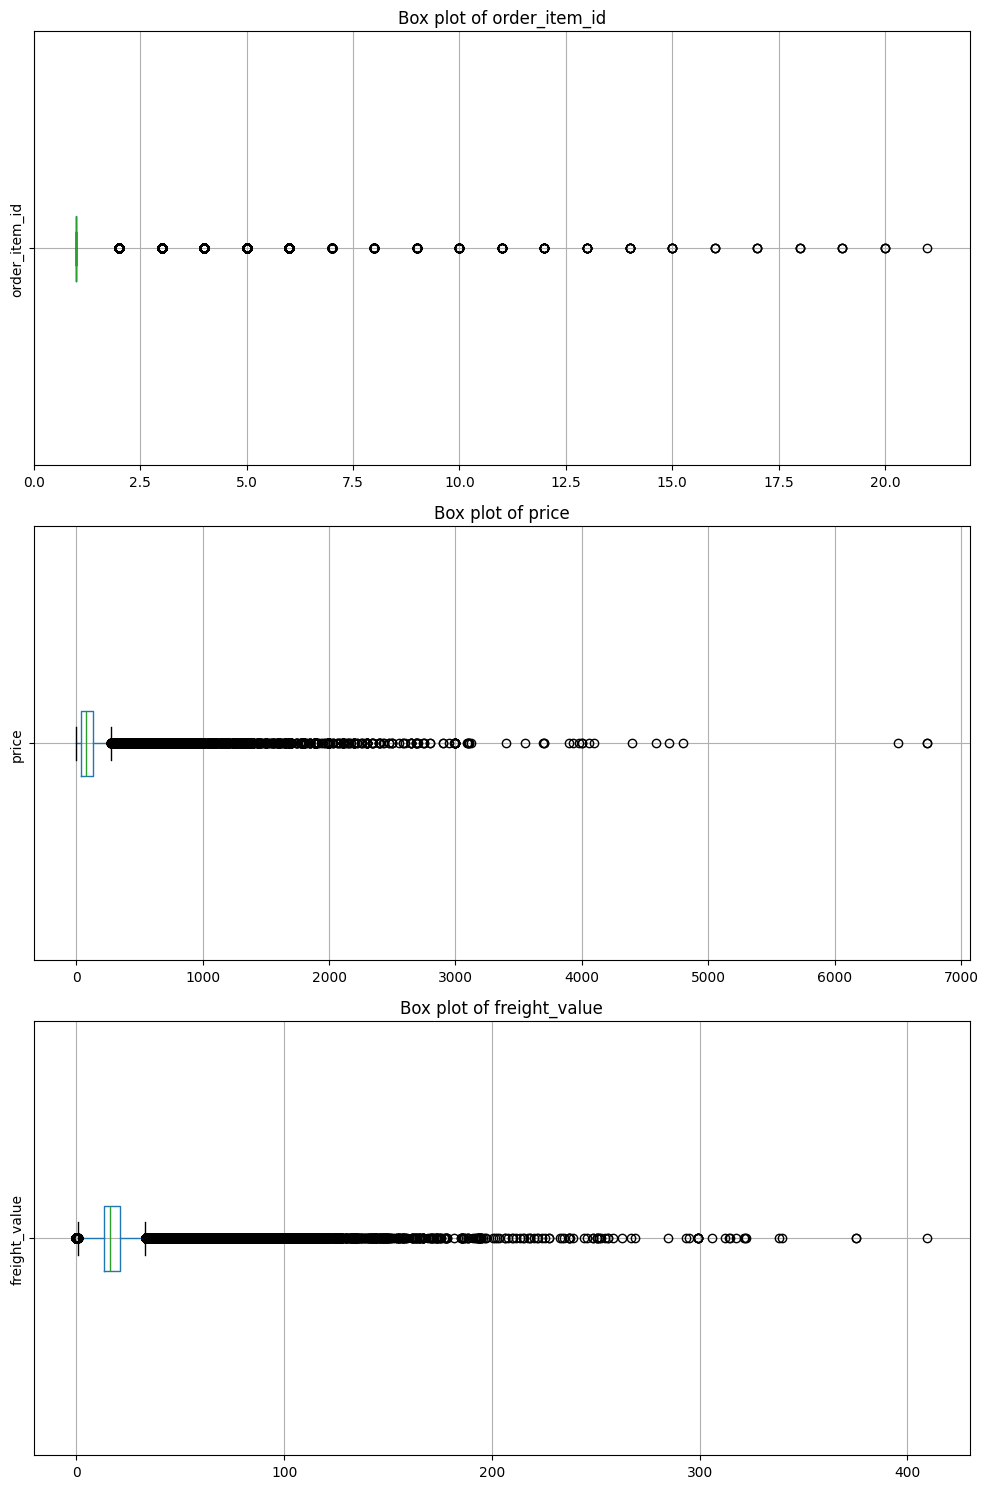

Data Assessment for 'order_payments':
 > Data shape:  (103886, 5)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > The outliers (payment_sequential, payment_installments, payment_value): 


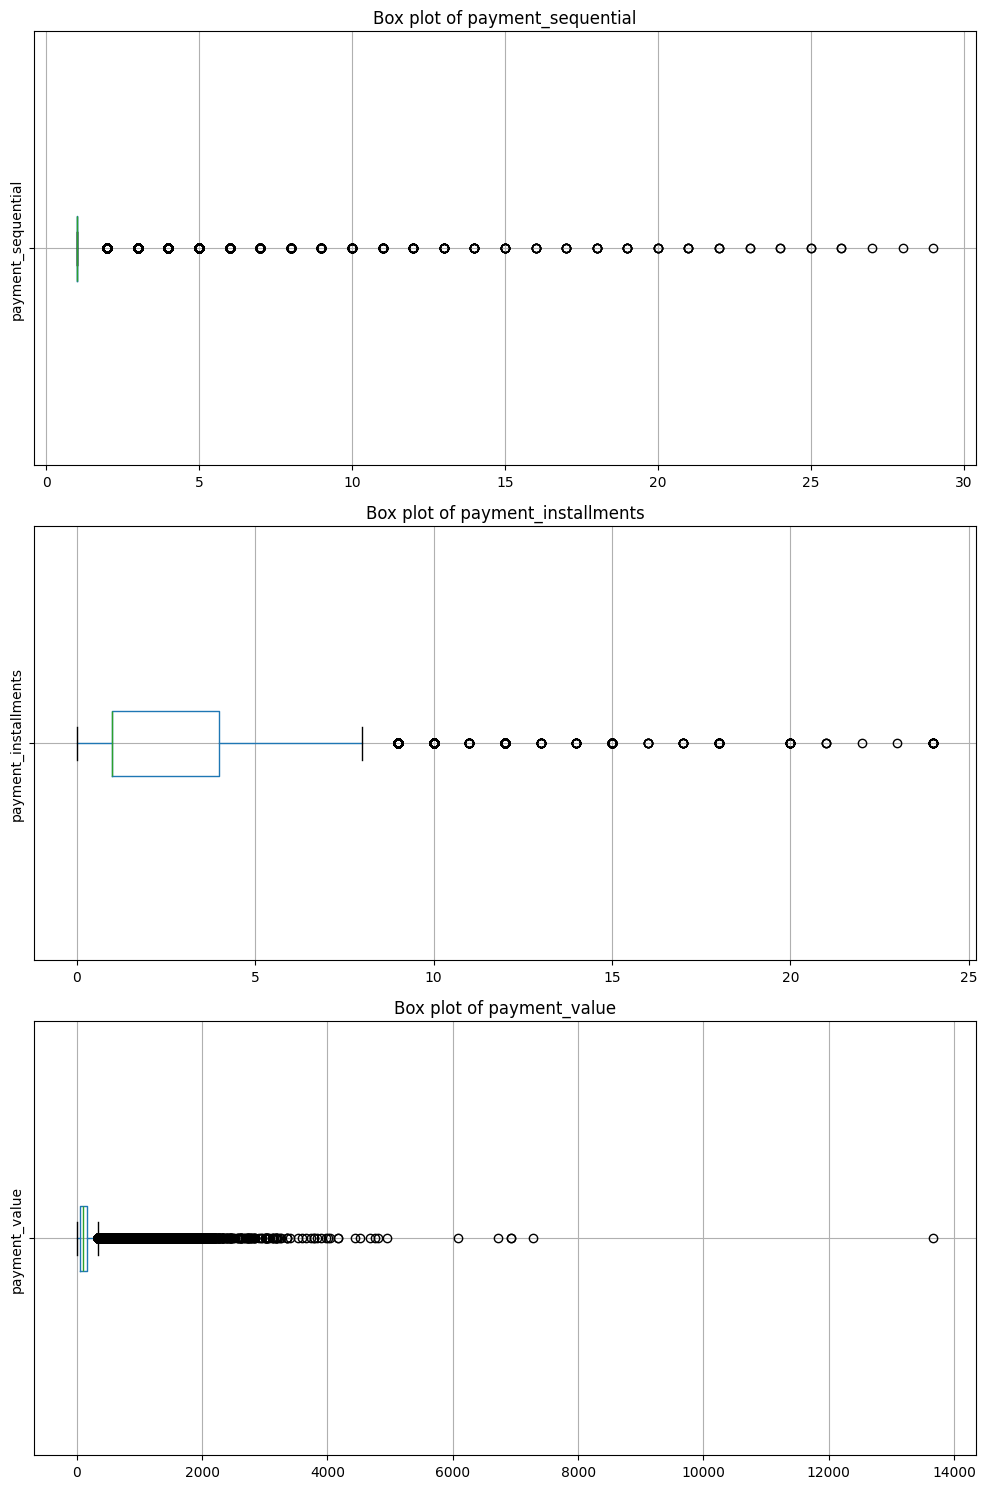

Data Assessment for 'order_reviews':
 > Data shape:  (99224, 8)
 > Columns that should be dropped:
      01. order_reviews
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - review_comment_title column : 88.34% (87656)
      - review_comment_message column : 58.70% (58247)
 > There is no duplicated data v
 > The outliers (review_score): 


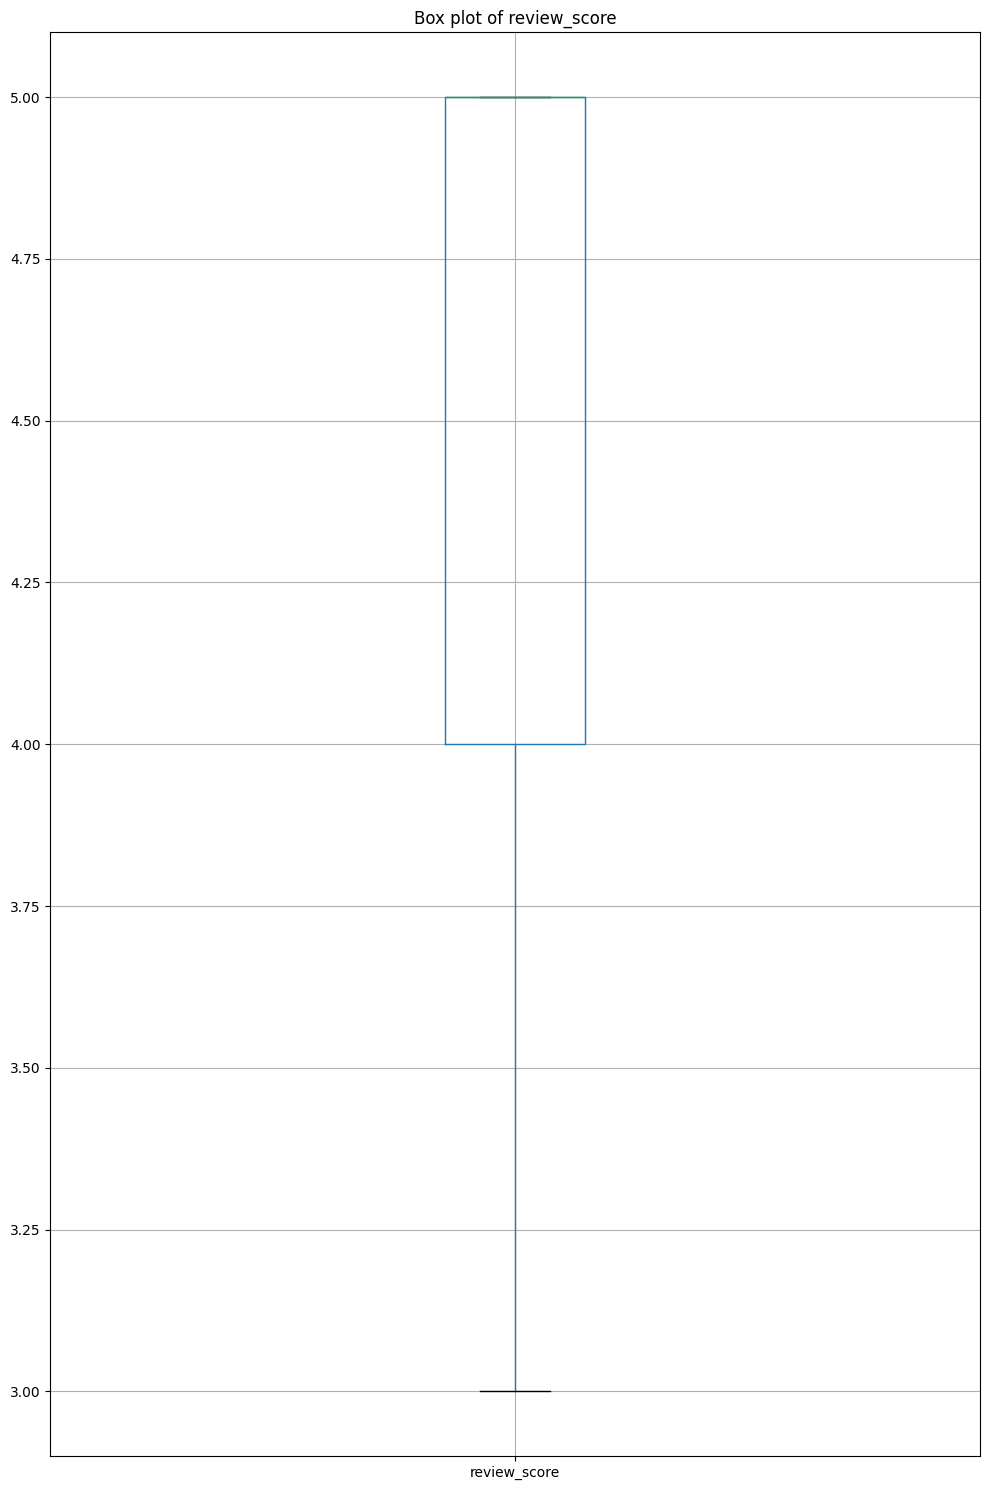

Data Assessment for 'orders':
 > Data shape:  (99441, 8)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - order_approved_at    column : 0.16% (160 )
      - order_delivered_carrier_date column : 1.79% (1783)
      - order_delivered_customer_date column : 2.98% (2965)
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'product_category_name_translations':
 > Data shape:  (71, 2)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers
Data Assessment for 'products':
 > Data shape:  (32951, 9)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > Missing value columns:
      - pr

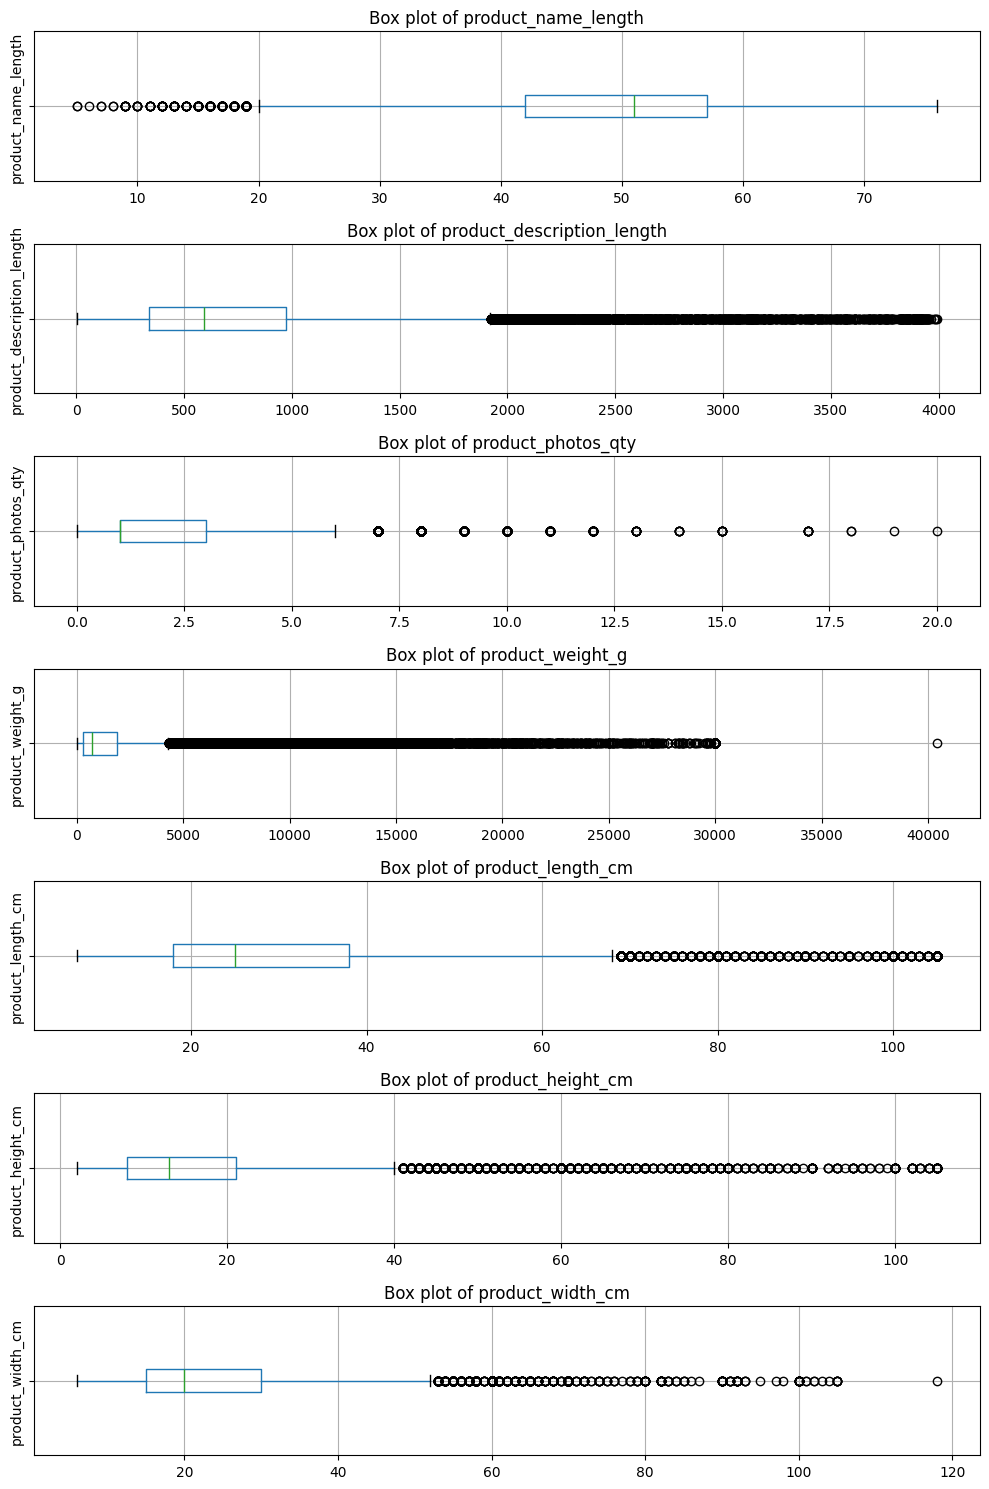

Data Assessment for 'sellers':
 > Data shape:  (3095, 4)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v
 > There is no available data to examine the outliers


In [4]:
# Create modified_data variable
modified_data = data

# Correct invalid column names
column_replacement = {
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}
modified_data['products'] = (
    modified_data['products']
    .rename(columns=column_replacement)
)

# Remove duplicated data
modified_data['geolocations'] = (
    modified_data['geolocations']
    .drop_duplicates(ignore_index=True)
)

# Handle missing value
## Handle missing value for
## - product_photos_qty column in products table
##   - Use imputation method with value=0
modified_data['products']['product_photos_qty'] = (
    modified_data['products']['product_photos_qty']
    .fillna(value=0)
)

## Handle missing value for
## - product_weight_g, product_length_cm, product_height_cm, product_width_cm columns in products table
##   - Use imputation method with value=mean
missing_value_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in missing_value_columns:
    modified_data['products'][col] = (
        modified_data['products'][col]
        .fillna(value=modified_data['products'][col].mean())
    )

# Handle outlier value for
## - review_score in order_reviews table
##   - Use imputation method with value = mean

## Add a custom method to pandas DataFrame
### Register a "custom" accessor and add "impute_outlier"
@pd.api.extensions.register_dataframe_accessor("custom")
class CustomAccessor:
    def __init__(self, pandas_obj):
        self._obj = pandas_obj

    def impute_outlier(self, col: str):
        Q1 = (self._obj[col]).quantile(0.25)
        Q3 = (self._obj[col]).quantile(0.75)
        IQR = Q3 - Q1
        
        maximum = Q3 + (1.5*IQR)
        minimum = Q1 - (1.5*IQR)

        condition_lower_than = self._obj[col] < minimum
        condition_more_than = self._obj[col] > maximum

        mean = self._obj[col].mean()

        self._obj.loc[condition_more_than, col] = mean
        self._obj.loc[condition_lower_than, col] = mean

        return self._obj

## Apply the method
modified_data['order_reviews'] = (
    modified_data['order_reviews']
    .custom.impute_outlier('review_score')
)

## Ensure the result is between 'review_score' range [1,5] (0 = no participation)
max_condition = modified_data['order_reviews']['review_score'] > 5
min_condition = (modified_data['order_reviews']['review_score'] < 1) & (modified_data['order_reviews']['review_score'].notna())

modified_data['order_reviews'].loc[max_condition, 'order_reviews'] = 5
modified_data['order_reviews'].loc[min_condition, 'order_reviews'] = 1

# Match the data types
for table_ in c.requirements.keys():
    modified_data[table_] = (
        modified_data[table_]
        .astype(c.requirements[table_])
    )

# Assess the data using asses_data
for source_ in c.source.keys():
    u.asses_data(modified_data[source_], source_)

**Insight:**

- Semua kolom sudah sesuai dengan tipe data dari *requirements*
- Kolom 'product_name_lenght' dan 'product_description_lenght' pada tabel "products" sudah diubah menjadi 'product_name_length' dan 'product_description_length'
- Beberapa data yang mempunyai *missing value* dibiarkan karena digunakan sebagai indikator (contoh: tanggal sebagai penanda sebuah peristiwa terjadi, nama barang yang belum tersedia, dan sebagainya).
- *Missing value* sudah diatasi pada kolom 'product_photos_qty' di tabel "products" dengan imputasi nilai 0 dan kolom-kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', dan 'product_width_cm' di tabel "products" dengan imputasi nilai mean
- Sudah tidak ada data duplikat
- Beberapa data yang memiliki *outlier* sengaja dibiarkan sebagai atribut identitas (contoh: lokasi dan harga).
- *Outlier* sudah diatasi pada kolom 'review_score' di tabel 'order_reviews' dengan imputasi nilai mean

## Exploratory Data Analysis (EDA)

### Explore the data

In [23]:
for table_ in c.requirements.keys():
    print(f"{'-':-^70}")
    print(f"Table: {table_}")
    print(f"{'-':-^70}")
    print(modified_data[table_].describe(include="all"))

----------------------------------------------------------------------
Table: customers
----------------------------------------------------------------------
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746  
----------------------------------------------------------------------
Table: geolocations
---------------------------------------

**Insight:**
- Pada data "customers",
  - Customer_id bersifat unik, tetapi jika ingin melihat customer secara unik, gunakan customer_unique_id
  - Customer paling banyak berada di kota Sao Paulo jika dilihat dari kota dan negara bagian dengan kode SP jika dilihat dari negara bagian
- Pada data "geolocation", disediakan lokasi dengan rentang 45.1° LU sampai 36.6° LS dan 101.5° BB sampai 121.1° BT.
- Pada data "order_items",
  - Tidak ada primary key (semua freq > 1)
  - Tidak ada kolom qty sehingga untuk menghitung jumlah produk jenis tertentu, harus dilakukan perhitungan lebih lanjut
  - Rentang harga sangat besar (min: 0.85, max: 6735), menandakan variasi prosuk yang sangat beragam
- Pada data "order_payments",
  - Rata-rata pembayaran dilakukan tunai (mean = 1), tetapi ada yang sampai melakukan hingga 29 kali
  - Payment terbanyak menggunakan credit_card
- Pada data "order_reviews", rata-rata review_score tinggi (4.5) dengan top judul komentar "Recomendo"
- Pada data "orders", tidak semua pesanan terkirim
- Pada data "product_category_name_translations", masing-masing kategori dalam bahasa Portugis Brazil mempunyai terjemahan dalam Bahasa Inggris
- Pada data "products", kategori yang paling banyak adalah "cama_mesa_banho" (3029)
- Pada data "sellers", mayoritas penjual berada di kota Sao Paulo jika berdasarkan kota, dan berada di negara bagian dengan kode SP jika berdasarkan negara bagian.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan antara penilaian ulasan (*score review*) dengan penjualan produk?

In [40]:
# Create a dataframe based on orders, order_reviews, order_items, products, and product_category_name_translation
df = (
    pd.merge(
        modified_data['orders'][['order_id', 'order_status','order_purchase_timestamp']],
        modified_data['order_reviews'][['order_id', 'review_score', 'review_comment_title', 'review_comment_message']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['order_items'][['order_id', 'price', 'freight_value', 'product_id']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['products'][['product_id', 'product_category_name']],
        how="left",
        on="product_id"
    )
    .merge(
        modified_data['product_category_name_translations'][['product_category_name', 'product_category_name_english']],
        how="left",
        on="product_category_name"
    )
    .drop(columns=['product_category_name'])
    .drop()
)

df.head()

,order_id,order_status,order_purchase_timestamp,review_score,review_comment_title,review_comment_message,price,freight_value,product_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,4.0,Muito boa a loja,Muito bom o produto.,118.70,22.76,595fac2a385ac33a80bd5114aec74eb8,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,5.0,NaN,NaN,159.90,19.22,aa4383b373c6aca5d8797843e5594415,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,5.0,NaN,O produto foi exatamente o que eu esperava e e...,45.00,27.20,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,5.0,NaN,NaN,19.90,8.72,65266b2da20d04dbe00c5c2d3bb7859e,stationery


In [53]:
# Filter only for 'delivered' order_status
df = df[df['order_status'] == 'delivered']

# Aggregate the data
agg_df = (
    df
    .groupby(['product_category_name_english'])
    .agg({
        'price': ['sum'],
        'review_score': ['mean']
    })
    .sort_values(by=('price','sum'), ascending=False)
)

agg_df.head()

order_id               price review_score
                                 count nunique         sum         mean
product_category_name_english                                          
health_beauty                     9519    8647  1237439.95     4.550952
watches_gifts                     5869    5495  1167246.63     4.494177
bed_bath_table                   11107    9272  1037177.69     4.441856
sports_leisure                    8489    7530   960189.09     4.541713
computers_accessories             7708    6530   896243.28     4.477370

In [61]:
# Calculate the correlation
correlation = agg_df[('review_score','mean')].corr(agg_df[('price', 'sum')])
status = 'Positive-' if correlation >= 0 else 'Negative-'
status += 'Mid to strong' if abs(correlation) >= 0.5 else 'Low to no correlation'
print(f'The correlation between average review_score and total revenue over different products is {correlation:.2f} ({status})')

The correlation between average review_score and total revenue over different products is -0.03 (Negative-Low to no correlation)


### Pertanyaan 2: Dimana lokasi geografis dengan tingkat penggunaan produk tertinggi.

In [55]:
# Create a dataframe based on df, orders, customers, and geolocations
df_2 = (
    pd.merge(
        df,
        modified_data['orders'][['order_id', 'customer_id']],
        how="left",
        on="order_id"
    )
    .merge(
        modified_data['customers'][['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'customer_zip_code_prefix']],
        how="left",
        on="customer_id"
    )
    .merge(
        modified_data['geolocations'][['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
        how="left",
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix"
    )
)

df_2.head()

,order_id,order_status,order_purchase_timestamp,review_score,review_comment_title,review_comment_message,price,freight_value,product_id,product_category_name_english,year_month,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,2017-10,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,2017-10,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.578333,-46.587123
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,2017-10,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.575033,-46.587451
3,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,2017-10,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.580054,-46.586673
4,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",29.99,8.72,87285b34884572647811a353c7ac498a,housewares,2017-10,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,3149,-23.576281,-46.587276


In [95]:
# Aggregate the data
agg_df_2 = (
    df_2
    .groupby(['customer_state'])
    .agg({
        'customer_unique_id': ['nunique'],
        'order_id': ['count', 'nunique'],
    })
    .sort_values(by=('order_id','count'), ascending=False)
    .reset_index()
)

agg_df_2.head()

customer_state customer_unique_id order_id        
                            nunique    count nunique
0             SP              39156  4338897   40501
1             MG              11001  2500903   11354
2             RJ              11917  1815551   12350
3             RS               5168   683926    5345
4             PR               4769   511486    4923

In [96]:
# Print top 5 highest product usage (order_id.count) based on the customer_city
points = '\n- '
print(f"Top 5 highest product usage based on the customer's state:\n- {points.join([rows[('customer_state','')]+' ('+'{:,}'.format(rows[('order_id', 'count')])+')' for i, rows in agg_df_2.head().iterrows()])}")

Top 5 highest product usage based on the customer's state:
- SP (4,338,897)
- MG (2,500,903)
- RJ (1,815,551)
- RS (683,926)
- PR (511,486)


In [ ]:
# Aggregate the data
agg_df_3 = (
    df_2
    .groupby(['customer_city', 'customer_state'])
    .agg({
        'customer_unique_id': ['nunique'],
        'order_id': ['count', 'nunique'],
    })
    .sort_values(by=('order_id','count'), ascending=False)
    .reset_index()
)

agg_df_3.head()

In [94]:
# Print top 5 highest product usage (order_id.count) based on the customer_city
points = '\n- '
print(f"Top 5 highest product usage based on the customer's city:\n- {points.join([str(rows[('customer_city','')]).title()+', '+rows[('customer_state','')]+' ('+'{:,}'.format(rows[('order_id', 'count')])+')' for i, rows in agg_df_3.head().iterrows()])}")

Top 5 highest product usage based on the customer's city:
- Rio De Janeiro, RJ (1,045,267)
- Sao Paulo, SP (853,305)
- Belo Horizonte, MG (527,247)
- Niteroi, RJ (231,317)
- Curitiba, PR (185,094)


**Insight:**
- The correlation between average review_score and total revenue over different products is -0.03 (Negative-Low to no correlation)
- Top 5 highest product usage based on the customer's state:
  - SP (4,338,897)
  - MG (2,500,903)
  - RJ (1,815,551)
  - RS (683,926)
  - PR (511,486)
- Top 5 highest product usage based on the customer's city:
  - Rio De Janeiro, RJ (1,045,267)
  - Sao Paulo, SP (853,305)
  - Belo Horizonte, MG (527,247)
  - Niteroi, RJ (231,317)
  - Curitiba, PR (185,094)

## Analisis Lanjutan (Opsional)

In [103]:
df[['order_id', 'price']].groupby(['order_id']).sum()

,price
order_id,
00010242fe8c5a6d1ba2dd792cb16214,58.90
00018f77f2f0320c557190d7a144bdd3,239.90
000229ec398224ef6ca0657da4fc703e,199.00
00024acbcdf0a6daa1e931b038114c75,12.99
00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...
fffc94f6ce00a00581880bf54a75a037,299.99
fffcd46ef2263f404302a634eb57f7eb,350.00
fffce4705a9662cd70adb13d4a31832d,99.90


In [112]:
df.shape #[['order_id', 'customer_unique_id', 'geolocation_lat', 'geolocation_lng']].drop_duplicates()

(110840, 11)

In [109]:
# RFM Analysis

## Create a dataframe based on df and df_2
df_3 = (
    df[['order_id', 'order_purchase_timestamp', 'price']]
    .groupby(['order_id'])
    .agg({
        'order_purchase_timestamp':'max',
        'price': 'sum'
    })
    .reset_index()
    .merge(
        (
            df_2[['order_id', 'customer_unique_id', 'geolocation_lat', 'geolocation_lng']]
            .drop_duplicates()
        ),
        how="left",
        on="order_id"
    )
    .rename(columns={'price':'revenue w/o freight value'})
)

df_3.head()
## Recency of the users

,order_id,order_purchase_timestamp,revenue w/o freight value,customer_unique_id,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9,871766c5855e863f6eccc05f988b23cb,-21.758076,-41.312633
1,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9,871766c5855e863f6eccc05f988b23cb,-21.758843,-41.306754
2,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9,871766c5855e863f6eccc05f988b23cb,-21.767046,-41.311328
3,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9,871766c5855e863f6eccc05f988b23cb,-21.771661,-41.312119
4,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,58.9,871766c5855e863f6eccc05f988b23cb,-21.763006,-41.306182


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2